<a href="https://colab.research.google.com/github/KiranTanwani/Machine-Learning/blob/main/Linear_Regression_Basic_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#find the relation between size of house and price.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive #to import google drive data

In [ ]:
drive.mount('/content/drive') #to mount the drive data into colab cloud and enter the activation code

Mounted at /content/drive


In [ ]:
cd /content/drive/"My Drive/Colab Notebooks/Linear Regression"

/content/drive/My Drive/Colab Notebooks/Linear Regression


In [ ]:
#columnname=['x','y']
dataset=pd.read_csv("train.csv")
print(dataset)
dataset.shape

        x          y
0    24.0  21.549452
1    50.0  47.464463
2    15.0  17.218656
3    38.0  36.586398
4    87.0  87.288984
..    ...        ...
695  58.0  58.595006
696  93.0  94.625094
697  82.0  88.603770
698  66.0  63.648685
699  97.0  94.975266

[700 rows x 2 columns]


(700, 2)

In [ ]:
dataf=pd.DataFrame(dataset)
dataf.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [ ]:
#Separating the feature matrix and the target variable
x_value = dataf.iloc[0:700,0:1]
y_value = dataf.iloc[0:700,1:2]

In [ ]:
x_value

,x
0,24.0
1,50.0
2,15.0
3,38.0
4,87.0
...,...
695,58.0
696,93.0
697,82.0
698,66.0


In [ ]:
y_value

,y
0,21.549452
1,47.464463
2,17.218656
3,36.586398
4,87.288984
...,...
695,58.595006
696,94.625094
697,88.603770
698,63.648685


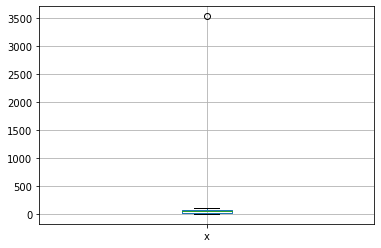

In [ ]:
#Plotting the box plot for feature matrix
x_box=x_value.boxplot(column=['x'])

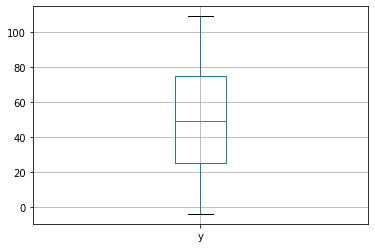

In [ ]:
#Plotting box plot for target variable
y_box=y_value.boxplot(column=['y'])

Text(0.5, 1.0, '1st LR scatter plot')

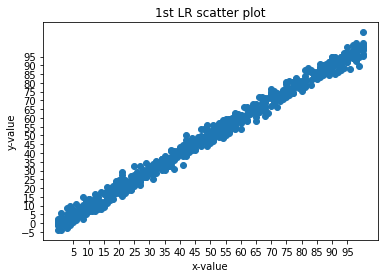

In [ ]:
import matplotlib.pyplot as plt
#Plotting the scatter plot
plt.scatter(x_value,y_value)
plt.xticks(np.arange(5,100,step=5))
plt.yticks(np.arange(-5,100,step=5))
plt.xlabel("x-value")
plt.ylabel("y-value")
plt.title("1st LR scatter plot")

In [ ]:
#define hypothesis

def hypothesis(theta_array,x): #theta_array = [theta_array[0],theta_array[1]]
  return theta_array[0]+theta_array[1]*x

In [ ]:
def cost_function(theta_array,x,y,m):  #x and y are list of observations
  total_error = 0
  for i in range(m):
    total_error+=(theta_array[0]+theta_array[1]*x[i]-y[i])**2
  
  return total_error/(2*m)

In [ ]:
#defining the gradient descent function
def gradient_descent(theta_array,x,y,alpha,m):
  summation_0 = 0
  summation_1 = 0

  for i in range(m):
    summation_0+=((theta_array[0]+theta_array[1]*x[i])-y[i])
    summation_1+=((theta_array[0]+theta_array[1]*x[i])-y[i])*x[i]

  new_theta_0 = theta_array[0] - alpha*(summation_0/m)
  new_theta_1 = theta_array[1] - alpha*(summation_1/m)

  updated_theta_array=[new_theta_0,new_theta_1]
  print("New Theta values are :",updated_theta_array)

  return updated_theta_array
  

In [ ]:
#defining the training function
def training(x,y,alpha,iters):
  theta_0=0
  theta_1=0
  theta_array=[theta_0,theta_1]
  cost_function_values=[]

  m=x.size #size of dataset / number of observations

  for i in range(iters):
    theta_array=gradient_descent(theta_array,x,y,alpha,m)

    cost_function_values.append(cost_function(theta_array,x,y,m)) 
    if i %10 ==0:
      y_new=x*theta_array[1]+theta_array[0] #linear regression line
      plt.plot(x,y_new,'r')
      plt.scatter(x,y)
      plt.show()

  x=np.arange(0,len(cost_function_values),step=1)
  plt.plot(x,cost_function_values,"-b")
  plt.xlabel("Number of iterations")
  plt.ylabel("Cost/loss Values")
  plt.title("Cost Function Curve")
  plt.show()


In [ ]:
training_data=pd.read_csv("train.csv")
cleaning_dataset=training_data.dropna() #it drops the observations for NaN
cleaning_dataset

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [ ]:
x_train=cleaning_dataset['x']
y_train=cleaning_dataset['y']

In [ ]:
x_train.shape

(699,)

In [ ]:
x_value=x_train.values.reshape(x_train.size)
y_value=y_train.values.reshape(y_train.size)

New Theta values are : [0.004993986917045777, 0.33354245845185393]


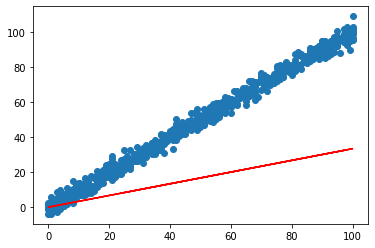

New Theta values are : [0.008319284972241507, 0.5557035214498389]
New Theta values are : [0.010533127355656105, 0.7036773052035968]
New Theta values are : [0.012006667742524584, 0.802237518771347]
New Theta values are : [0.012987118705779474, 0.8678850693676076]
New Theta values are : [0.01363913995457534, 0.9116106382126297]
New Theta values are : [0.01407240560255935, 0.9407347363616418]
New Theta values are : [0.014359965767857034, 0.9601333019877012]
New Theta values are : [0.014550476597125737, 0.9730540281668936]
New Theta values are : [0.014676346259828743, 0.9816600904650489]
New Theta values are : [0.01475916071211147, 0.9873923049996323]


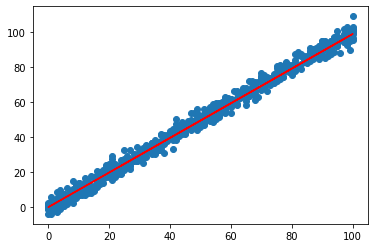

New Theta values are : [0.014813297609683014, 0.9912103493470457]
New Theta values are : [0.01484833340967559, 0.993753431411396]
New Theta values are : [0.01487064665759465, 0.9954473053779638]
New Theta values are : [0.014884485881074296, 0.9965755513231513]
New Theta values are : [0.014892680876819898, 0.9973270520871346]
New Theta values are : [0.01489711647413762, 0.9978276159698669]
New Theta values are : [0.014899048092367667, 0.9981610395106341]
New Theta values are : [0.014899311922731282, 0.9983831366740062]
New Theta values are : [0.01489846492315943, 0.9985310832033687]
New Theta values are : [0.014896878063986173, 0.9986296405702794]


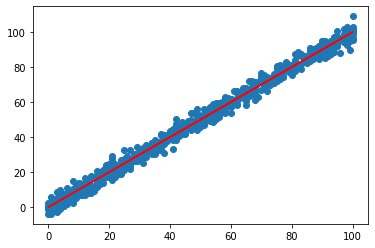

New Theta values are : [0.014894798435666618, 0.9986953015309791]
New Theta values are : [0.01489239061657083, 0.9987390513376072]
New Theta values are : [0.014889764226634673, 0.9987682068850972]
New Theta values are : [0.014886992279889691, 0.9987876417030486]
New Theta values are : [0.014884123408445882, 0.9988006018802705]
New Theta values are : [0.014881190004462082, 0.9988092495237824]
New Theta values are : [0.014878213643229672, 0.9988150247379799]
New Theta values are : [0.014875208695300289, 0.9988188867263863]
New Theta values are : [0.014872184732398647, 0.9988214743811554]
New Theta values are : [0.014869148129917511, 0.9988232132461622]


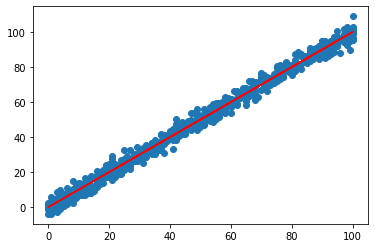

New Theta values are : [0.014866103134283944, 0.9988243867614027]
New Theta values are : [0.014863052573894888, 0.9988251837164145]
New Theta values are : [0.014859998332646675, 0.9988257298573517]
New Theta values are : [0.014856941665336583, 0.9988261089393607]
New Theta values are : [0.014853883407740857, 0.9988263767488356]
New Theta values are : [0.014850824116540384, 0.998826570443156]
New Theta values are : [0.014847764162520326, 0.9988267147715622]
New Theta values are : [0.014844703792647162, 0.9988268262186631]
New Theta values are : [0.014841643171416043, 0.998826915764285]
New Theta values are : [0.014838582408390833, 0.9988269907217081]


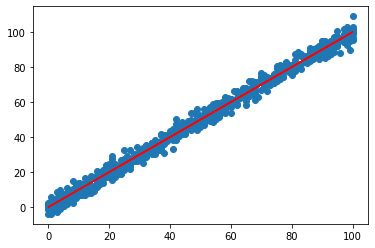

New Theta values are : [0.014835521576547574, 0.9988270559620549]
New Theta values are : [0.014832460724492432, 0.9988271147298107]
New Theta values are : [0.014829399884599642, 0.9988271691860144]
New Theta values are : [0.014826339078431916, 0.9988272207700593]
New Theta values are : [0.014823278320350786, 0.9988272704406749]
New Theta values are : [0.014820217619921328, 0.9988273188364378]
New Theta values are : [0.01481715698351386, 0.9988273663826819]
New Theta values are : [0.014814096415370794, 0.9988274133627071]
New Theta values are : [0.014811035918317205, 0.9988274599652097]


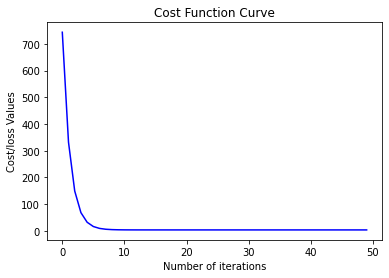

In [ ]:
#Training the model
alpha=0.0001
iter=50
training(x_value,y_value,alpha,iter)